In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
aiohttp                      3.8.6
aiosignal                    1.3.1
altgraph                     0.17.2
anyio                        4.0.0
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.0
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
Babel                        2.13.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.1.0
cachetools                   5.3.1
certifi                      2023.7.22
cffi                         1.16.0
charset-normalizer           3.3.0
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
de

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

data_dir = '/Users/rishabhsharma/PycharmProjects/EmailTemplate/data'

# List all files and subdirectories in the directory
files = os.listdir(data_dir)

# Filter out the .DS_Store files
ds_store_files = [f for f in files if f.lower() == '.ds_store']

# Remove each .DS_Store file
for ds_store_file in ds_store_files:
    os.remove(os.path.join(data_dir, ds_store_file))


In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /Users/rishabhsharma/PycharmProjects/EmailTemplate/data/blurry/.DS_Store


In [10]:
os.listdir(data_dir)

['non-blurry', 'blurry']

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1050 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

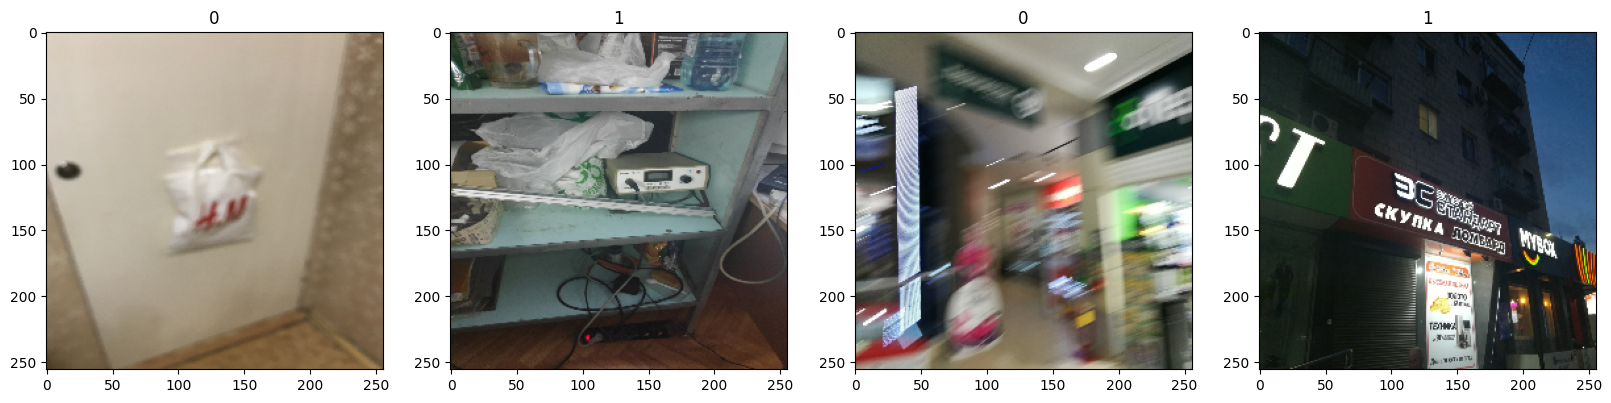

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
#0-blurry
#1-non-blurry

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[9.86274481e-01, 9.70588207e-01, 8.21568608e-01],
          [9.86274481e-01, 9.74509776e-01, 8.13725471e-01],
          [9.82352912e-01, 9.70588207e-01, 8.09803903e-01],
          ...,
          [8.66666675e-01, 8.33333313e-01, 6.80392146e-01],
          [8.65686297e-01, 8.38235319e-01, 6.73529387e-01],
          [8.58823538e-01, 8.31372559e-01, 6.66666687e-01]],
 
         [[9.90196049e-01, 9.74509776e-01, 8.25490177e-01],
          [9.91176486e-01, 9.71568644e-01, 8.14705908e-01],
          [9.90196049e-01, 9.64705884e-01, 8.09803903e-01],
          ...,
          [8.65686297e-01, 8.30392182e-01, 6.77450955e-01],
          [8.69607866e-01, 8.34313750e-01, 6.81372523e-01],
          [8.58823538e-01, 8.27450991e-01, 6.74509823e-01]],
 
         [[9.88235295e-01, 9.76470590e-01, 8.15686285e-01],
          [9.86274481e-01, 9.66666639e-01, 8.01960766e-01],
          [9.87254918e-01, 9.67647076e-01, 8.10784340e-01],
          ...,
          [8.71568620e-01, 8.34313750e-01, 6.8725

In [19]:
len(data)

33

In [20]:
train_size = 23
val_size = 5
test_size = 5

In [21]:
train_size+val_size+test_size

33

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 13s 495ms/step - loss: 0.7181 - accuracy: 0.5870 - val_loss: 0.5722 - val_accuracy: 0.7312
Epoch 2/20
23/23 [==============================] - 12s 494ms/step - loss: 0.5756 - accuracy: 0.7554 - val_loss: 0.5429 - val_accuracy: 0.7312
Epoch 3/20
23/23 [==============================] - 12s 491ms/step - loss: 0.4809 - accuracy: 0.7894 - val_loss: 0.4661 - val_accuracy: 0.7688
Epoch 4/20
23/23 [==============================] - 13s 510ms/step - loss: 0.3517 - accuracy: 0.8668 - val_loss: 0.3929 - val_accuracy: 0.8313
Epoch 5/20
23/23 [==============================] - 13s 501ms/step - loss: 0.2576 - accuracy: 0.9117 - val_loss: 0.2744 - val_accuracy: 0.8750
Epoch 6/20
23/23 [==============================] - 13s 501ms/step - loss: 0.1945 - accuracy: 0.9253 - val_loss: 0.2542 - val_accuracy: 0.9062
Epoch 7/20
23/23 [==============================] - 13s 506ms/step - loss: 0.1286 - accuracy: 0.9592 - val_loss: 0.2279 - val_accuracy: 0.9250

In [32]:
hist.history

{'loss': [0.7181019186973572,
  0.5755991339683533,
  0.48094072937965393,
  0.3517282009124756,
  0.2575991749763489,
  0.19452331960201263,
  0.12860296666622162,
  0.21085739135742188,
  0.12782257795333862,
  0.1054190993309021,
  0.09539463371038437,
  0.045508064329624176,
  0.047412700951099396,
  0.02405257150530815,
  0.05048618093132973,
  0.03445363789796829,
  0.024637851864099503,
  0.009189962409436703,
  0.004494044929742813,
  0.023857450112700462],
 'accuracy': [0.5869565010070801,
  0.7554348111152649,
  0.789402186870575,
  0.866847813129425,
  0.9116848111152649,
  0.92527174949646,
  0.95923912525177,
  0.9225543737411499,
  0.960597813129425,
  0.9646739363670349,
  0.970108687877655,
  0.9864130616188049,
  0.9850543737411499,
  0.9972826242446899,
  0.9850543737411499,
  0.98777174949646,
  0.9959239363670349,
  1.0,
  1.0,
  0.998641312122345],
 'val_loss': [0.5722302794456482,
  0.5429258942604065,
  0.4661006033420563,
  0.3928511440753937,
  0.27435684204101

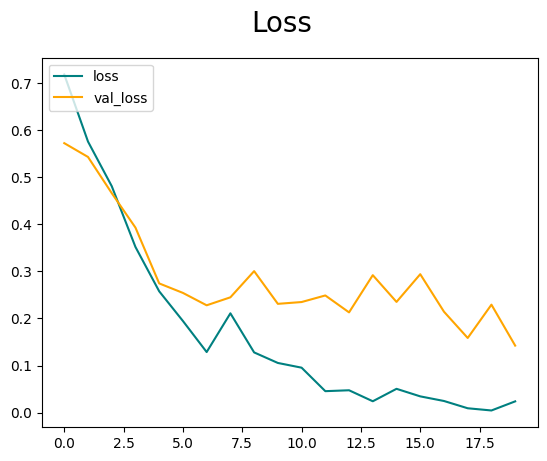

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

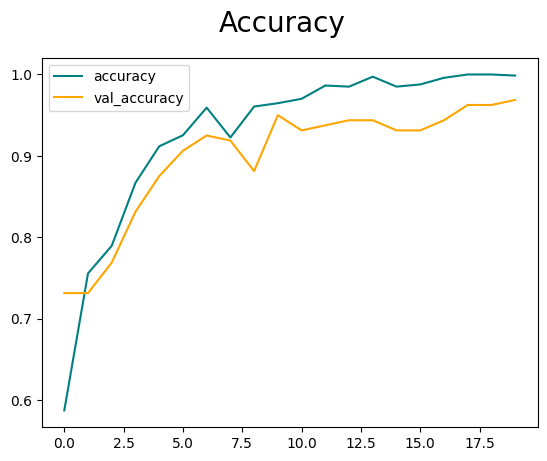

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
len(test)

5

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 71ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9230769, shape=(), dtype=float32) tf.Tensor(0.8, shape=(), dtype=float32) tf.Tensor(0.9220779, shape=(), dtype=float32)


In [40]:
import cv2

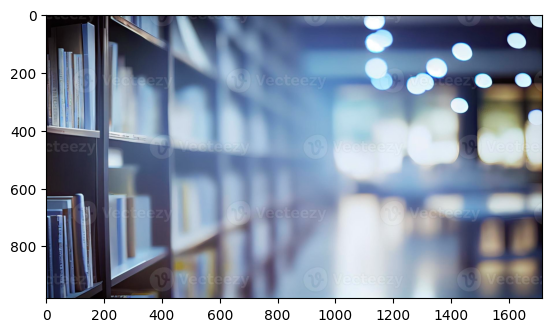

In [83]:
img = cv2.imread('blurrytest.jpg')
plt.imshow(img)
plt.show()

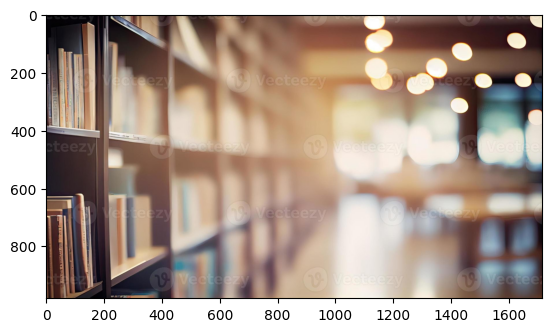

In [84]:
img = cv2.imread('blurrytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

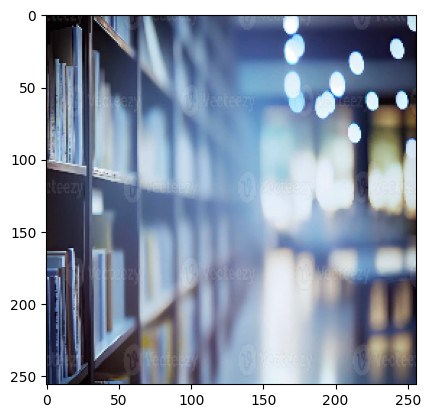

In [85]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
np.expand_dims(resize, 0) #for wrapping around another list

array([[[[ 25.738052  ,  20.738052  ,  22.738052  ],
         [  8.816513  ,   3.816513  ,   5.816513  ],
         [  7.558258  ,   5.558258  ,   5.558258  ],
         ...,
         [183.70346   , 225.78549   , 248.26872   ],
         [173.88867   , 218.64131   , 240.54883   ],
         [175.15475   , 222.26436   , 239.42429   ]],

        [[ 28.194046  ,  23.194046  ,  25.194046  ],
         [  7.451172  ,   2.4511719 ,   4.451172  ],
         [  2.7324219 ,   0.7324219 ,   0.7324219 ],
         ...,
         [186.27344   , 219.41898   , 234.86867   ],
         [187.40831   , 223.24219   , 238.09766   ],
         [179.53827   , 218.41005   , 231.69774   ]],

        [[ 33.249527  ,  28.249527  ,  30.249527  ],
         [  4.344696  ,   0.27438354,   1.344696  ],
         [ 15.422012  ,  13.422012  ,  13.422012  ],
         ...,
         [197.36955   , 221.22893   , 233.22893   ],
         [194.87062   , 222.73      , 233.80031   ],
         [195.14062   , 225.72104   , 237.02182   ]],

In [87]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [88]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 62ms/step


In [89]:
yhat

array([[0.24883485]], dtype=float32)

In [90]:
if yhat < 0.5: 
    print(f'Predicted class is Blurry')
else:
    print(f'Predicted class is Non-Blurry')

Predicted class is Blurry


In [ ]:
import cv2
img = cv2.imread('blurrytest.jpeg')
plt.imshow(img)
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
img = cv2.imread('blurrytest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat < 0.5: 
    print(f'Predicted class is Blurry')
else:
    print(f'Predicted class is Non-Blurry')

In [74]:
from tensorflow.keras.models import load_model

In [75]:
model.save(os.path.join('models','blurdetectmodel.h5'))

/Users/rishabhsharma/PycharmProjects/EmailTemplate/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
new_model = load_model(os.path.join('models','blurdetectmodel.h5'))

In [77]:
yhatnew = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [78]:
yhatnew

array([[0.9999988]], dtype=float32)

In [79]:
if yhatnew < 0.5: 
    print(f'Predicted class is Blurry')
else:
    print(f'Predicted class is Non-Blurry')

Predicted class is Non-Blurry


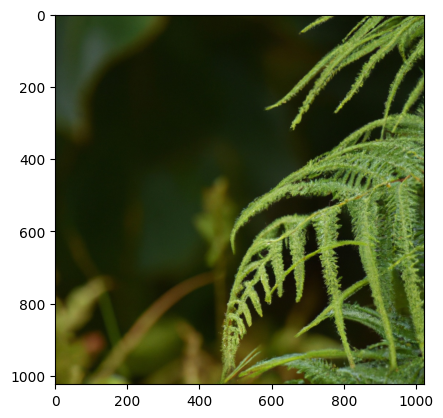

In [80]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
img = cv2.imread('generated_image.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [81]:
import tensorflow as tf
from tensorflow.keras.models import load_model
new_model = load_model(os.path.join('models','blurdetectmodel.h5'))
resize = tf.image.resize(img, (256,256))
yhat = new_model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 28ms/step


array([[0.00808519]], dtype=float32)

In [82]:
if yhat < 0.5: 
    print(f'Predicted class is Blurry')
else:
    print(f'Predicted class is Non-Blurry')

Predicted class is Blurry
